In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import QuantileTransformer, quantile_transform

#from sklearn.utils.fixes import parse_version

#ames = fetch_openml(name="house_prices", as_frame=True)
# Keep only numeric columns
#X = ames.data.select_dtypes(np.number)
# Remove columns with NaN or Inf values
#X = X.drop(columns=["LotFrontage", "GarageYrBlt", "MasVnrArea"])
#y = ames.target
#y_trans = quantile_transform(
#    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
#).squeeze()

In [10]:
base = pd.read_csv('../../../Data/BaseData.csv')

In [11]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [12]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.660e+02, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.577e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.578e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.579e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [13]:
y = y.reshape(-1,1)

In [14]:
y

array([[126000],
       [139500],
       [124900],
       ...,
       [145000],
       [217500],
       [215000]])

In [15]:
y_trans = quantile_transform(y, n_quantiles=900, 
                             output_distribution="normal", copy=True)

In [16]:
y_trans

array([[-0.79792059],
       [-0.41750782],
       [-0.84145751],
       ...,
       [-0.27673971],
       [ 0.7751268 ],
       [ 0.74903253]])

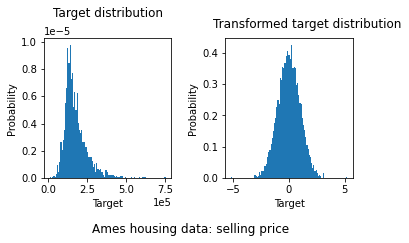

In [17]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.text(s="Target distribution", x=3e4, y=11.8e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.text(s="Transformed target distribution", x=-6.8, y=0.479, fontsize=12)

f.suptitle("Ames housing data: selling price", y=0.04)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y)

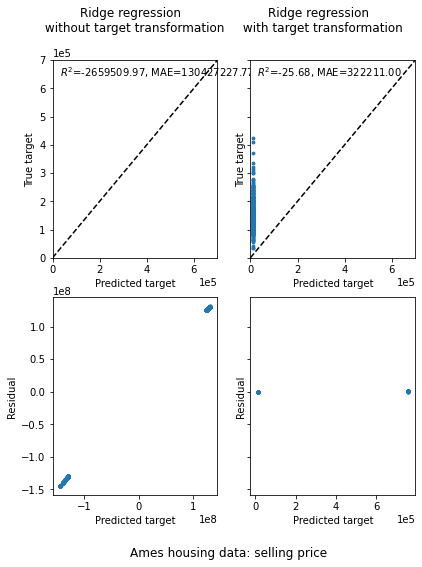

In [18]:
f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ax0[0].scatter(y_pred, y_test, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("True target")
ax0[0].set_xlabel("Predicted target")
ax0[0].text(
    s="Ridge regression \n without target transformation",
    x=-5e4,
    y=8e5,
    fontsize=12,
    multialignment="center",
)
ax0[0].text(
    3e4,
    64e4,
    r"$R^2$=%.2f, MAE=%.2f"
    % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
)
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Residual")
ax1[0].set_xlabel("Predicted target")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal"),
)
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ax0[1].scatter(y_pred, y_test, s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("True target")
ax0[1].set_xlabel("Predicted target")
ax0[1].text(
    s="Ridge regression \n with target transformation",
    x=-5e4,
    y=8e5,
    fontsize=12,
    multialignment="center",
)
ax0[1].text(
    3e4,
    64e4,
    r"$R^2$=%.2f, MAE=%.2f"
    % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
)
ax0[1].set_xlim([0, 7e5])
ax0[1].set_ylim([0, 7e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(y_pred, (y_pred - y_test), s=8)
ax1[1].set_ylabel("Residual")
ax1[1].set_xlabel("Predicted target")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()